# Dados Qualitativos

In [57]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import *
import numpy as np

#from statsmodels.formula.api import *

#from nltk.probability import FreqDist

dataset = pd.read_csv('dataset/qualitativos/reclamacoes_2018-03.csv',sep=';',encoding='latin1') # Setando o delimitador e a linguagem

dataset.head(4)# Mostrar apenas a quantidade de linhas informadas (Quando informado)


,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jacareí,M,entre 21 a 30 anos,16/03/2018,8.0,Mercado Livre,Comércio Eletrônico,Produtos de Telefonia e Informática,"Acessórios e periféricos (monitor, impressora,...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 21 a 30 anos,16/03/2018,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
2,SE,SP,São Paulo,F,entre 61 a 70 anos,21/03/2018,2.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,MG,Juatuba,M,entre 21 a 30 anos,19/03/2018,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,1


## Lista completa ordenada pela ocorrencia dos dados

In [58]:
#from collections import Counter
#coluna = 'Segmento de Mercado'
coluna = 'Área'
data = dataset[coluna]
#print(lista)
#print(Counter(lista).most_common(len(lista)))

#reclamacoes.columns # Retorna o nome das colunas

# Tipos de amostra

## Amostragem Inteiramente Aleatória

In [49]:
import random

aleatoria = []
QUANTIDADE = 25 # Quantidade da amostra
TAMANHO_LISTA = len(data)

numeros_aleatorios = random.sample(range(1,TAMANHO_LISTA), QUANTIDADE)

for i in numeros_aleatorios:
    aleatoria.append(data[i])

#print(aleatoria)

df = pd.DataFrame(aleatoria, columns=['Servico'])
df.to_csv('dataset_gerados/tabela_servicos.csv')
df
#print(Counter(amostragem).most_common(len(amostragem))) # Retorna os termos mais frequentes

,Servico
0,Telecomunicações
1,Serviços Financeiros
2,Serviços Financeiros
3,Produtos Eletrodomésticos e Eletrônicos
4,Telecomunicações
5,Produtos de Telefonia e Informática
6,Telecomunicações
7,Transportes
8,Saúde
9,Serviços Financeiros


## Amostragem Sistematica

In [50]:
import random

sistematica = []
QNT_AMOSTRA = 300

# Sorteando o ponto de partida da amostragem de acordo com a quantidade de amostra desejada
inicio_aleatorio = random.randint(1, QNT_AMOSTRA)
tamanho_lista = data.count()
INTERVALO = int(tamanho_lista / QNT_AMOSTRA)

print("Inicio: %d" % inicio_aleatorio)
print("Tamanho : %d" % tamanho_lista)
print("Intervalo: ", INTERVALO)

sistematica = data[inicio_aleatorio::INTERVALO]
#print(sistematica)
sistematica.append(data[0::INTERVALO])

sistematica

Inicio: 128
Tamanho : 48702
Intervalo:  162


128                         Serviços Financeiros
290                         Serviços Financeiros
452                             Telecomunicações
614                         Serviços Financeiros
776                             Telecomunicações
938                             Demais Serviços 
1100                        Serviços Financeiros
1262                        Serviços Financeiros
1424                        Serviços Financeiros
1586                            Telecomunicações
1748         Produtos de Telefonia e Informática
1910         Produtos de Telefonia e Informática
2072                            Telecomunicações
2234                            Telecomunicações
2396                            Telecomunicações
2558                            Telecomunicações
2720                          Água, Energia, Gás
2882                            Telecomunicações
3044                            Telecomunicações
3206                            Demais Serviços 
3368                

## Amostragem Estratificado

## Tabelas

In [51]:
from collections import Counter

#lista = celulares['Marca']
#lista = celulares['Marca'].value_counts()
#lista

#celulares = pd.read_csv('bases/celulares.csv',encoding='latin1')

tabela_frequencia = Counter(aleatoria).most_common(len(aleatoria))
#tabela_frequencia = Counter(celulares).most_common(len(celulares))

df = pd.DataFrame(tabela_frequencia, columns=['Servico','Quantidade'])
df.to_csv('dataset_gerados/tabela_frequencia_servicos.csv')
df

# Descrição dos dados
#df.describe()


,Servico,Quantidade
0,Telecomunicações,10
1,Serviços Financeiros,9
2,Produtos de Telefonia e Informática,2
3,Produtos Eletrodomésticos e Eletrônicos,1
4,Transportes,1
5,Saúde,1
6,Demais Produtos,1


## Gráficos

### Gráfico de Coluna

<IPython.core.display.Javascript object>


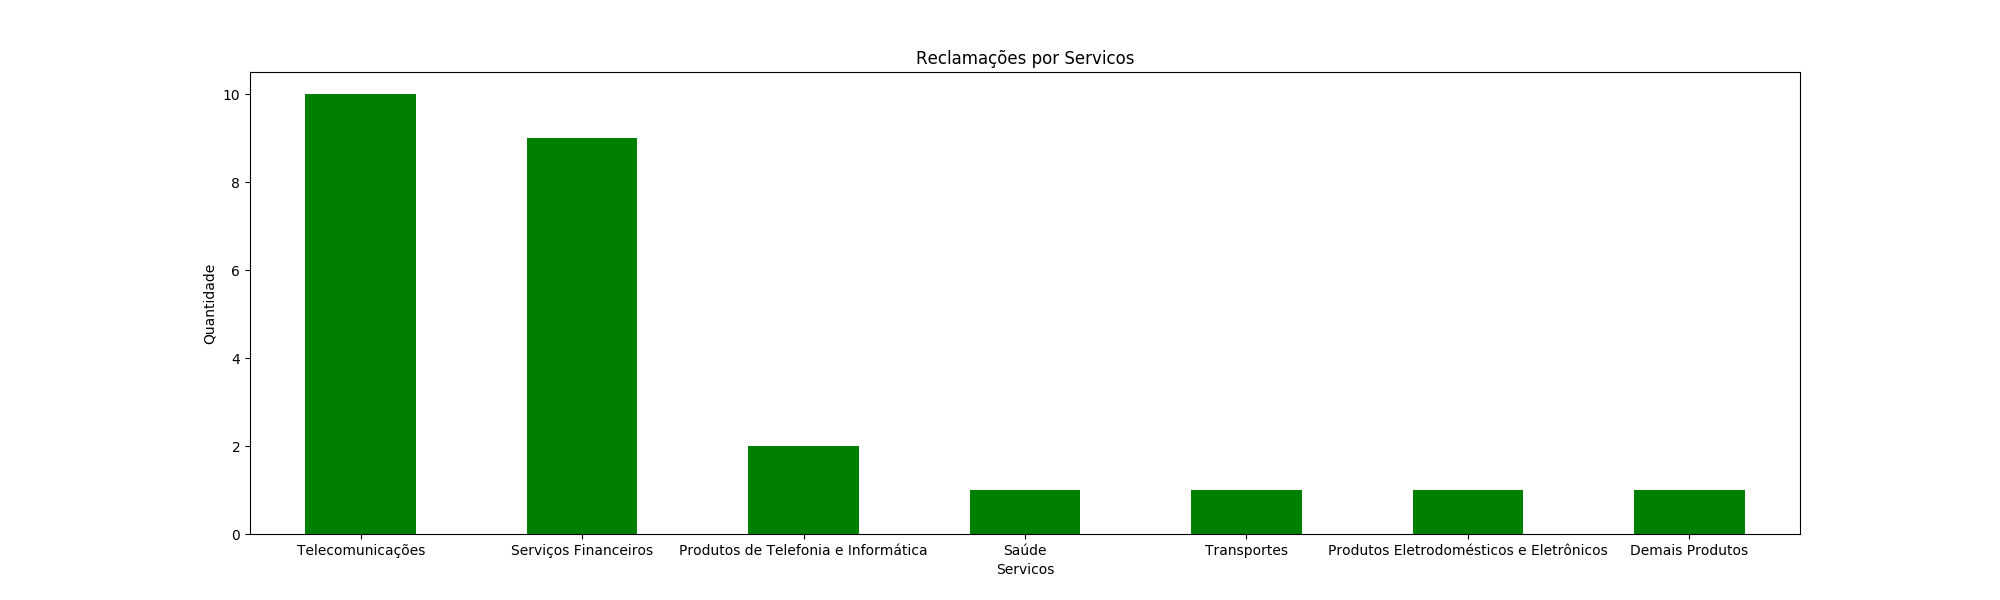

Text(0,0.5,'Quantidade')

In [59]:
servicos = pd.read_csv('dataset_gerados/tabela_servicos.csv',encoding='utf-8')

grafico_coluna = servicos['Servico'].value_counts().plot(kind='bar',figsize=(20,6), grid = False, rot = 0, color='green')
plt.title('Reclamações por Servicos')
plt.xlabel('Servicos')
plt.ylabel('Quantidade')
#plt.show()

### Gráfico de Barra

<IPython.core.display.Javascript object>


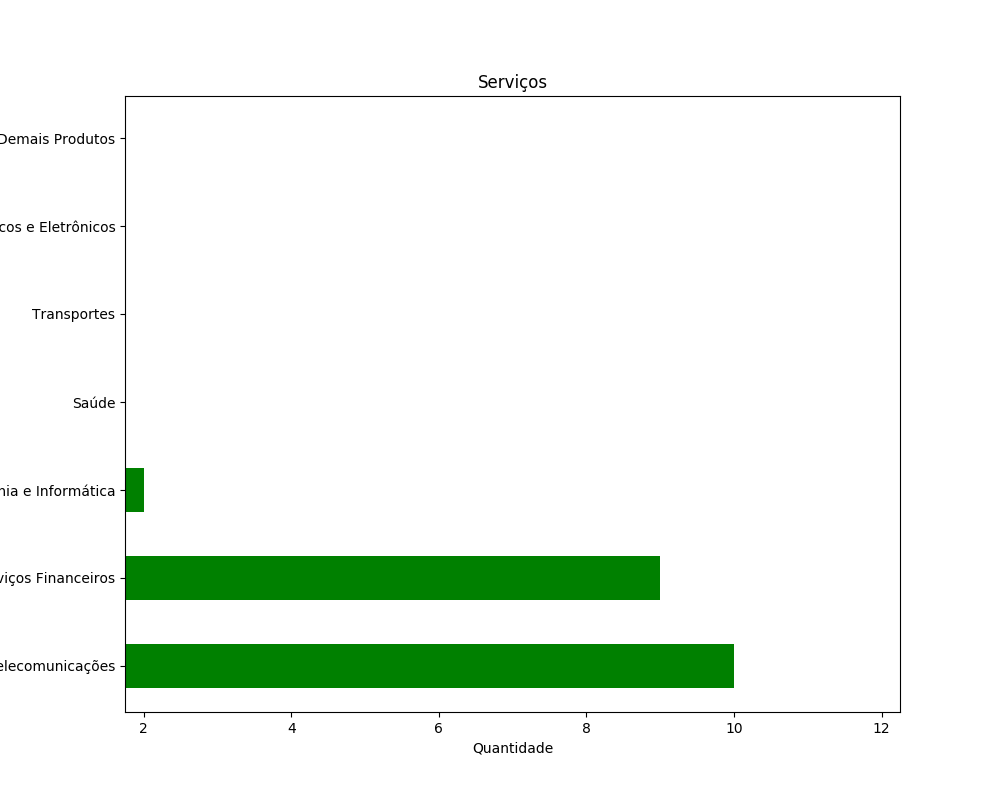

In [56]:
grafico_barra = servicos['Servico'].value_counts().plot(kind='barh',figsize=(10,8), grid = False, rot = 0, color='green')
plt.title('Serviços')
plt.xlabel('Quantidade')
plt.ylabel('Área')
plt.show()

### Gráfico de Pizza

<IPython.core.display.Javascript object>


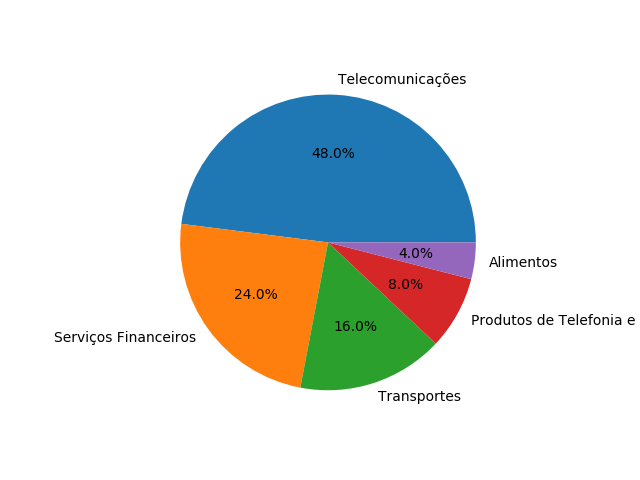

In [46]:
from matplotlib.gridspec import GridSpec

grafico_pizza_df = pd.read_csv('dataset_gerados/tabela_frequencia_servicos.csv',sep=',',encoding='utf-8')
#print(df)

the_grid = GridSpec(1, 1)

labels = grafico_pizza_df['Servico']
fracs = grafico_pizza_df['Quantidade']

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')
#plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

### Gráfico Polar

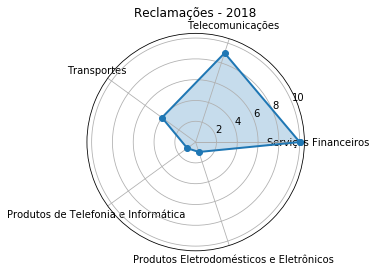

In [23]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import numpy as np
#!pip install seaborn
import seaborn as sns

#df=pd.read_csv("Pokemon.csv")

#df2=pd.read_csv("bases/aulas/tabela_frequencia_estados.csv")

# Pegando a linha com os labels
labels = list(df['Servico'])

# Pegando os valores correspondentes aos labels
stats = list(df['Quantidade'])

# Usado para selecionar valores de uma determinada linha
# labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
# stats = df.loc [ 386 , labels] .values

# Gerando os angulos
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)# Set the angle

# Usado para criar uma area fechada para o gráfico polar
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)   # Definindo o eixo axial
ax.plot(angles, stats, 'o-', linewidth=2)  # Desenhando o gráfico
ax.fill(angles, stats, alpha=0.25)  # Procurar a area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Definindo o rótulo para cada eixo do gráfico
ax.set_title("Reclamações - 2018") # Titulo do gráfico
#ax.set_title([df.loc[386,"Name"]])  # Set the pokemon's name as the title

#ax.set_rlim(0,250) # Setar valor maximo para valores dos circulos
ax.grid(True)